# **dbt Fundamentals**

https://learn.getdbt.com/courses/dbt-fundamentals

Learn the **foundational steps** of **transforming data** in **dbt Cloud**. Start by **connecting dbt Cloud** to a **data warehouse** and **Git repository**, then explore key concepts like **modeling**, **sources**, **testing**, **documentation**, and **deployment**. Get hands-on by **building a model** and **running tests** in dbt Cloud.

## **1 Introduction to Analytics Engineering**

**Learning Objectives**:

- Explain the **structure** of **traditional data teams**.
- Explain how **advances in technology** enabled the **transition** from **ETL** to **ELT**.
- Explain the role of **analytics enginee**r and the **modern data team**.
- Explain how **dbt** fits into the **modern data stack**.
- Understand the **structure** of a **dbt project**



### **1.1 Traditional Data Teams**

Traditional data teams have typically **two roles**:
- **Data Engineers**: they are in charge of **building the infrastructure** that the data is hosted on (usually **databases**) and of **managing** the **ETL process** (this makes sure the data is where it needs to be in the form of **tables** that the analysts can query). Their skillset includes **SQL**, **Orchestration**, **Python**, **Java**, etc (other **functional programming languages** used for data orchestration)
- **Data Analysts**: they tend to work **closer** to the **business decision makers** and finance, marketing and other departments. They typically **query the tables** built by the data engineers to create **dashboards** or other types of **reports**. Their skillset usually involves **Excel** and **SQL** (to query the tables).

In a nutshell, the data analysts **know what needs to be built** so that **business decision makers** can be **supported** in **their decisions**. The **data engineers** then have the skills to **know how to build those requirements** and put them into **production** and carry out **tables' refresh**  at some **cadence**.

There is a **gap** between the two roles, there is an opportunity for teams to work more efficiently. However, it wasn't until the **recent advent of some new data technologies** that it was possible to **re-think** what a **data team** could be.




### **1.2 ETL and ELT**

- **ETL** = **Extract**, **Transform** and **Load**. This has been typically handled by Data Engineers. This requires a few additional skills on top of **SQL**, including **Python**, **Java** or other **functional programming languages** to orchestrate the data extraction and transformation. Once the **final table** has been built, the process of **refreshing** it, **updating** it etc needs to be **automated**; this requires additional tools such as **airflow**. This is the process used within a **Traditional Data Team**.

- **ELT** = **Extract**, **Load** and **Transform**. This is a **new approach** adopted since the introduction of **Cloud-based Data Warehouses (DWs)**. Since these solutions are based in the cloud, an organisation can simply purchase them and scale them up as needed, without any need to build them in premise. DWs combine a **database** and a **super computer transforming** the **data**. This introduction has been a complete game changer for the analytics workflow: **data** can now be **transformed directly in the database**, without the need for repeated extraction and load everytime a database object needs to be rebuilt. ELT shifts focus to:
    1. **Get the data in the DW** (**EL**)
    2. **Transform** the data from there (**T**)  
    
    
    Furthermore, with a **cloud-based DW** you can have:
    1. **Scalable compute**
    2. **Scalable storage** (important as your organisation grows)
    3. **Reduction** of **Transfer time**



### **1.3 Analytics Engineer**

As explained, **Cloud DWs** make the **transition** from **ETL** to **ELT** possible. This change brought the rise of the new role of the **Analytics Engineer**. The Analytics Engineer owns the **Transformation** of **raw data** up to the **BI layer** (i.e. they are in charge of the **T** in **ELT**).

This new role frees up the **Data Engineer** to focus on **extracting/loading** (**EL**) the **raw data** from the **sources** into the **DW**. They can also focus on more macro-level things, such as **maintaining the data infrastructure**.

The **Data Analyst** can also work more closely with the Analytics Engineer to deliver the **final tables** that will be **queried** with the **BI tool** to create **dashboards** and **reporting** to stakeholders. 

**Modern Data Team**: **Data Engineer**, **Analytics Engineer**, **Data Analysts**

https://www.getdbt.com/what-is-analytics-engineering

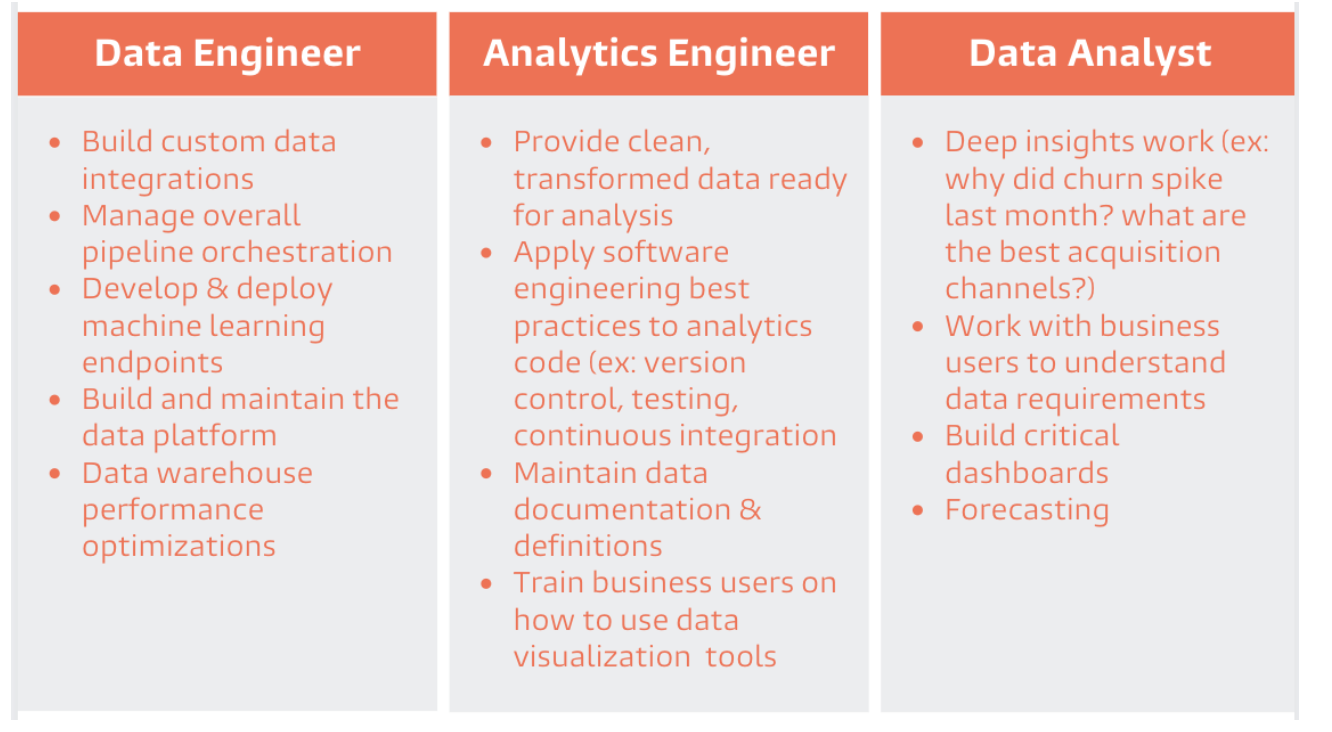

The lines between these roles are really **blurry** and people do not need to be siloed in any of this specific job description. They are tools for these roles and phase (Extract/Loading, Transforming, Extracting insights/Visualising)

### **1.4 The Modern Data Stack and dbt**

- Nowadays we have multiple **Data Sources** (e.g. about our business, external etc) that are used to make key decisions.
- At the centre of your data stack is your **Data Platform**, where **data is stored** as the central location of your business (e.g. Snowflake, Redshift, BQ, Databricks)
- The **data** can be **transferred from the Data Sources into the Data Platform** using **custom tools** (e.g. written in Python, Scala, Java, etc). You can also use specific tools called **Loaders** (**EL** step of ELT).  
- Once the data is in the **Data Platform** and it has been **curated**, you want to use it for some goal (including pushing the data back into our applications), with the help of:
    - **BI Tools** (e.g Tableau, Power BI)
    - **ML Models** (e.g. in a notebook)
    - **Operational Analytics** (e.g. using Census, https://docs.getcensus.com , or HighTouch https://hightouch.com)
- **dbt** works **directly with the Data Platform** to manage your **transformations**, **test** them and **document** them 



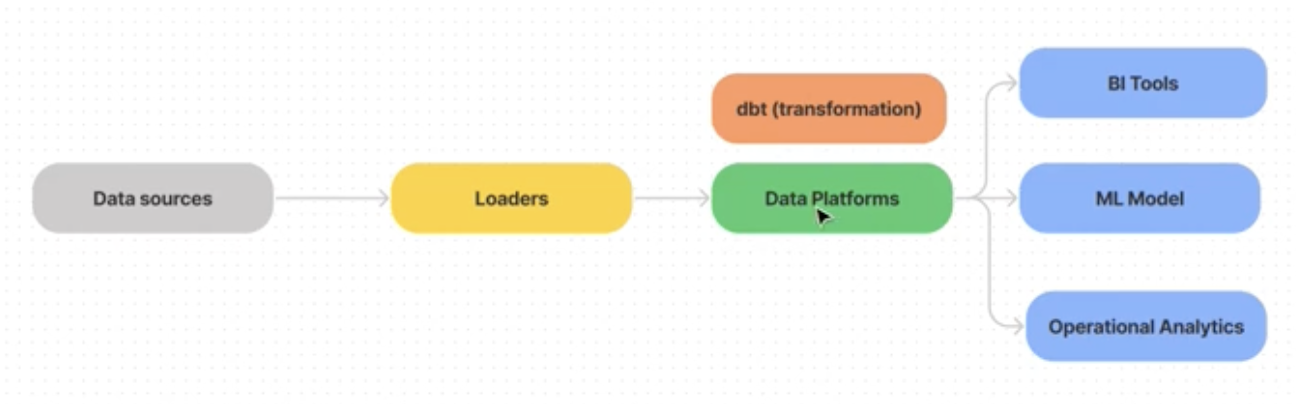

Let's examine more in depth the **interaction** between **dbt** and the **data platform**: 
- On the left we see **raw data coming in**. 
- At the** end of the workflow** process we have **datasets ready** for **BI tools, ML models** and **operational analytics**. 
- With **dbt** is really **easy to develop the transformation pipeline** because it allows you to use **modular code** as **SQL select statements** to **create data models**, **without** the need to worry about **DDL** (**Data Definition Language**) and **DML** (**Data Manipulation Language**) to wrap around that. While you write your models you also **build the dependencies** between them to transform data over time.

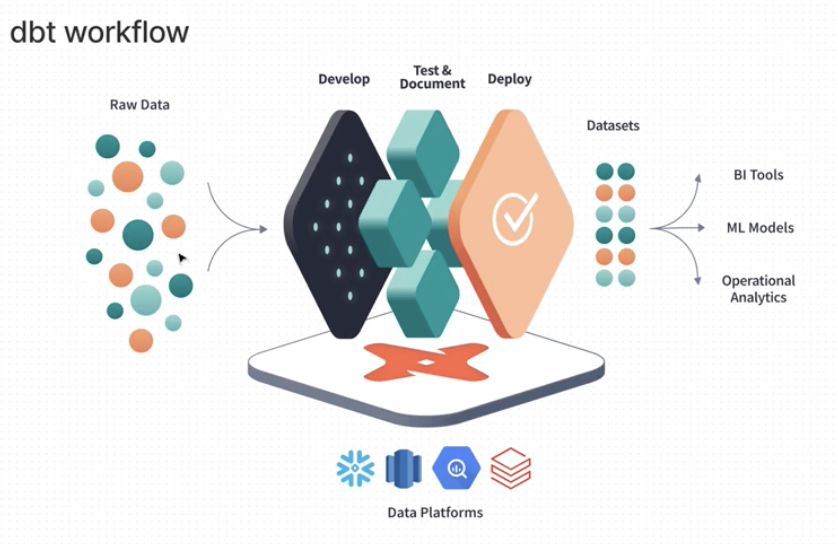

At the bottom you can see a dbt **DAG** (**Directed Acyclic Graph**): on the left (green) you can see the **data sources** which are then **transformed** within a **staging layer** (blue) into **multiple downstream data models**. We can finally make dbt aware of the **BI layer** or the **further downstream workflows** (orange). When you write dbt code, you are slowing assemblying this DAG and you can **visualise** a complete **data lineage** from **source** (green) to **use case** at the end (orange)

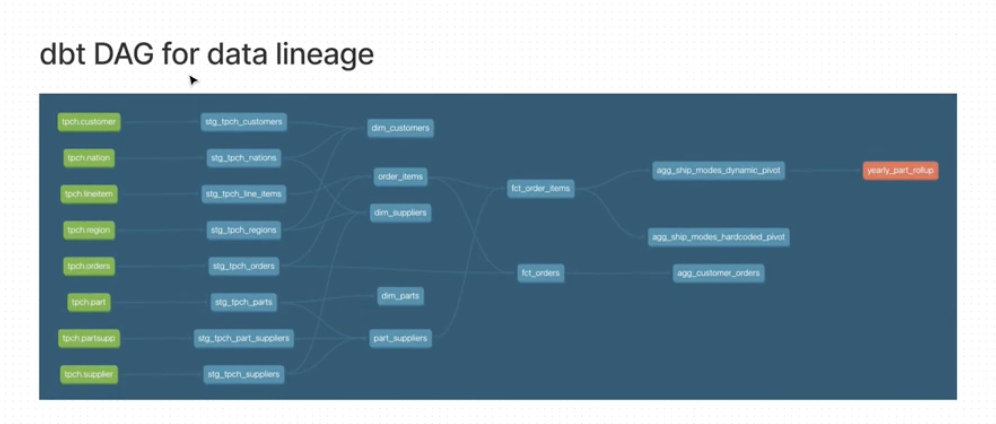

- As you are developing your models, you can also **test** them (e.g. ensure that a primary key is unique or not null) before shipping that data into production.
- While you are configuring tests, you can also **document your models** within the **same codebase** where you are writing the data transformations
- Once you have agreed and trust your transformations and you have tested\documented them, you can **deploy** your **dbt project on a schedule**. In dbt platform you can set a **production/deployment environment** and then a **job** that can **run weekly, daily, hourly etc**. You get refreshed datasets at the cadence that you need.

### **1.5 Overview of an Exemplar Project**

This is an example of **dbt DAG** that shows the **flow of data** from **source** (green nodes, imported in the data platform, e.g. with loaders or other automatic pipeline) all through the **final model** called `dim_customer` (purple). The blue nodes are called **models** and they map 1:1 with a **table/view** in the data platform, which are **designed/built** in **dbt** and be made **persistent** in our **data platform** (e.g. BQ). The **dependencies** between nodes are given by the **directed arrows**.


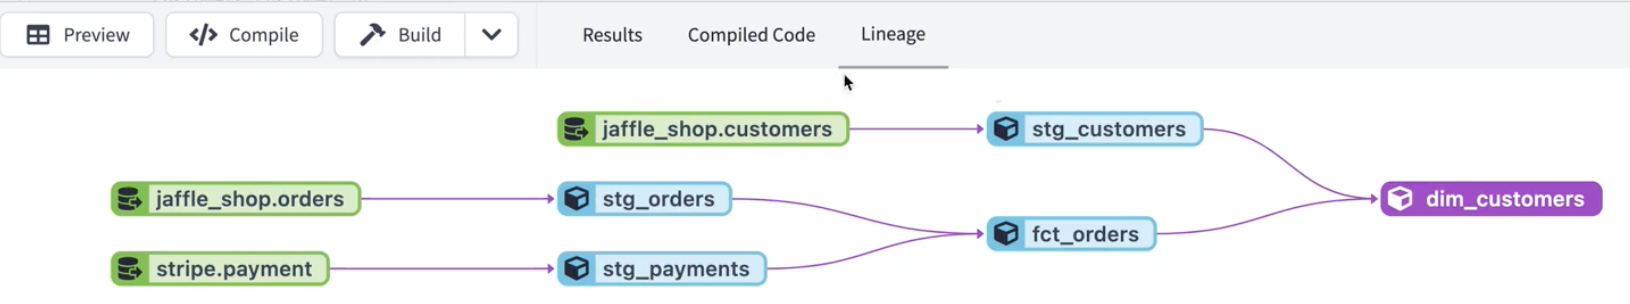

An important command is **`dbt run`**, which is going to **build each of the models** represented in the DAG in the **order from left to right**. See below an example of running this command:

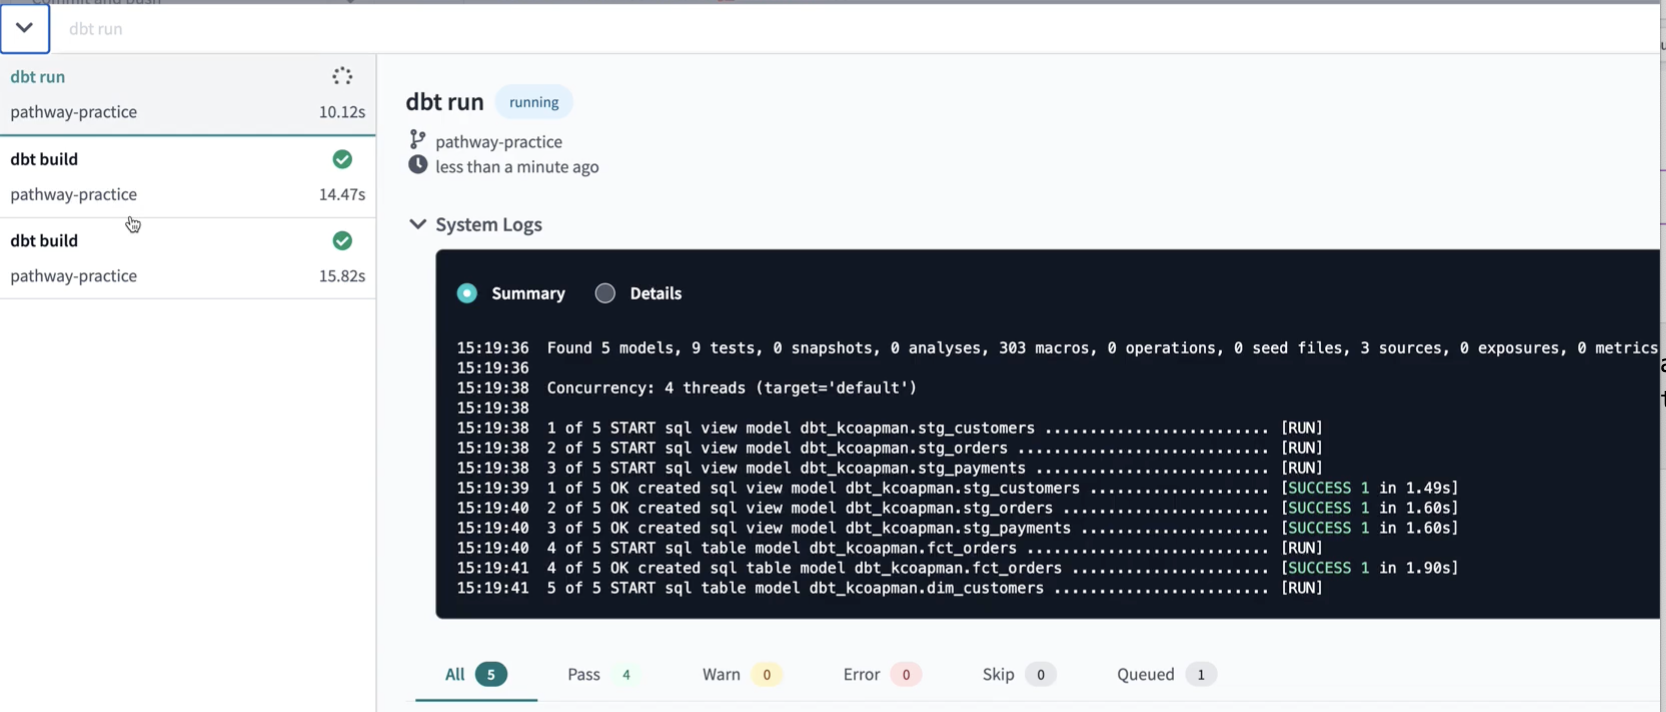

See an example of **dbt configuration** to **transform** the `stripe.payment` **data source**, written using a **yaml file** (`src_stripe.yaml`):

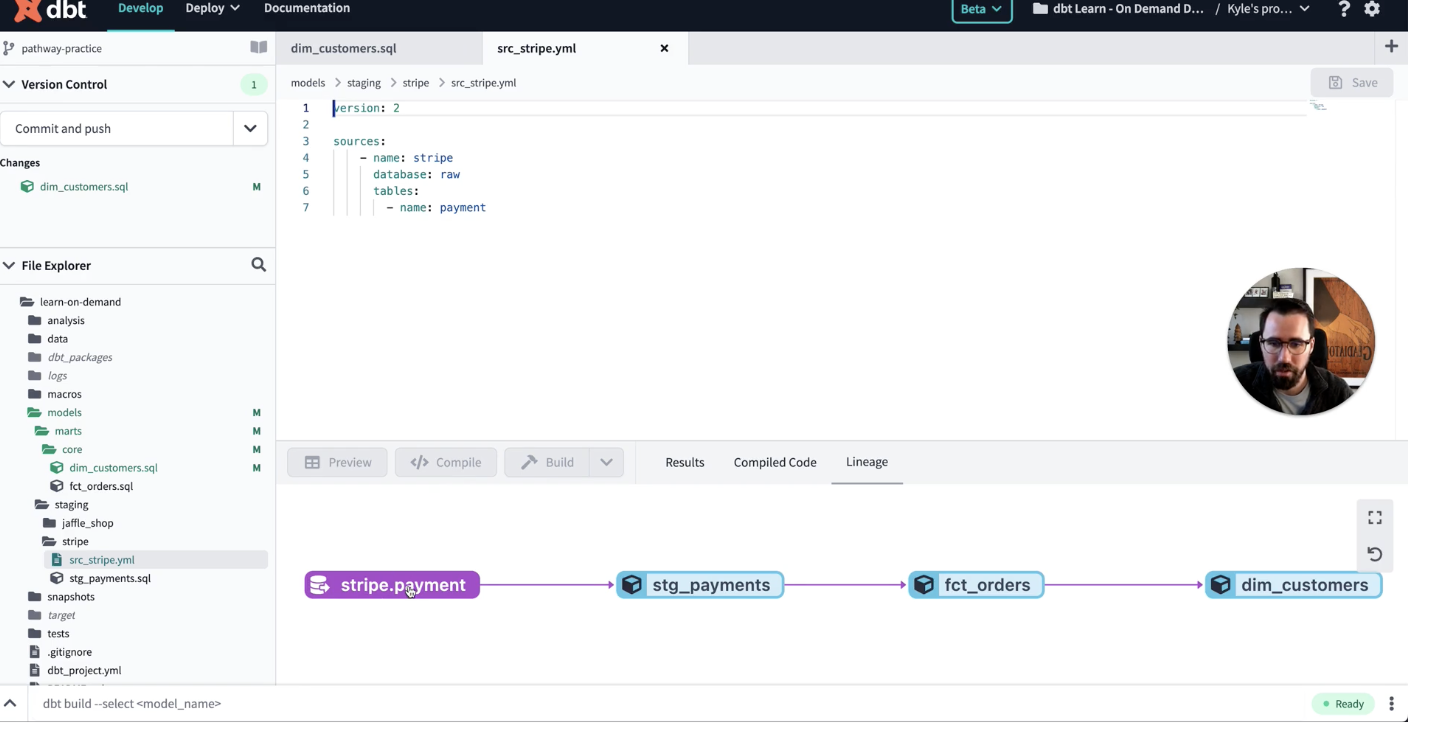

The **data transformation dependencies** back to that initial source (`stripe.payment`) can be inspected. It was built using a **source macro** (`stg_payments.sql`):

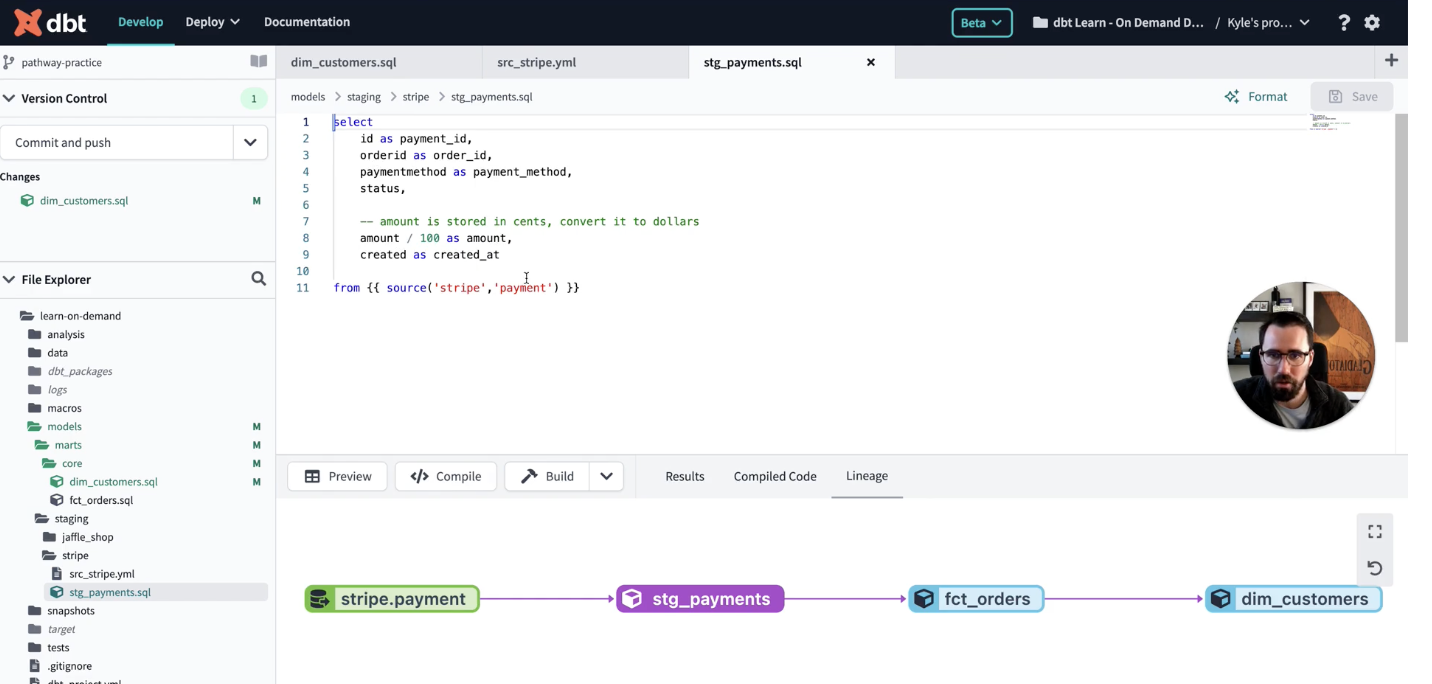

You can also **refer to other data models** created in dbt using the **`ref`** command. For example in th snippet below we can see that the model `fct_orders` refers to the two models `stg_orders` and `stg_payments`:

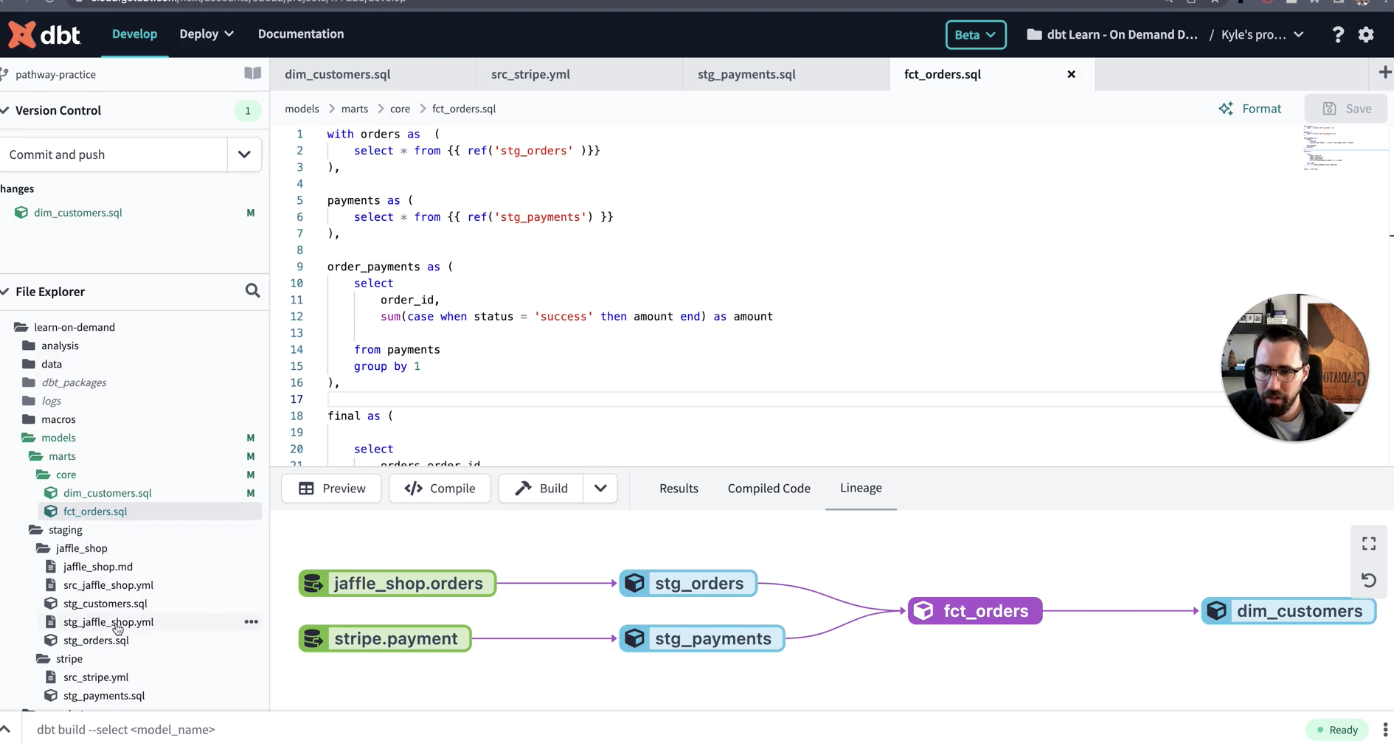

**Tests** and **docs** can be **configured** in **yaml files**, quickly and easily.
*
In the snippet below, we can see some **testing enforced** in the `stg_customer` module for the column `customer_id`, tested for uniqueness and for the lack of null values:

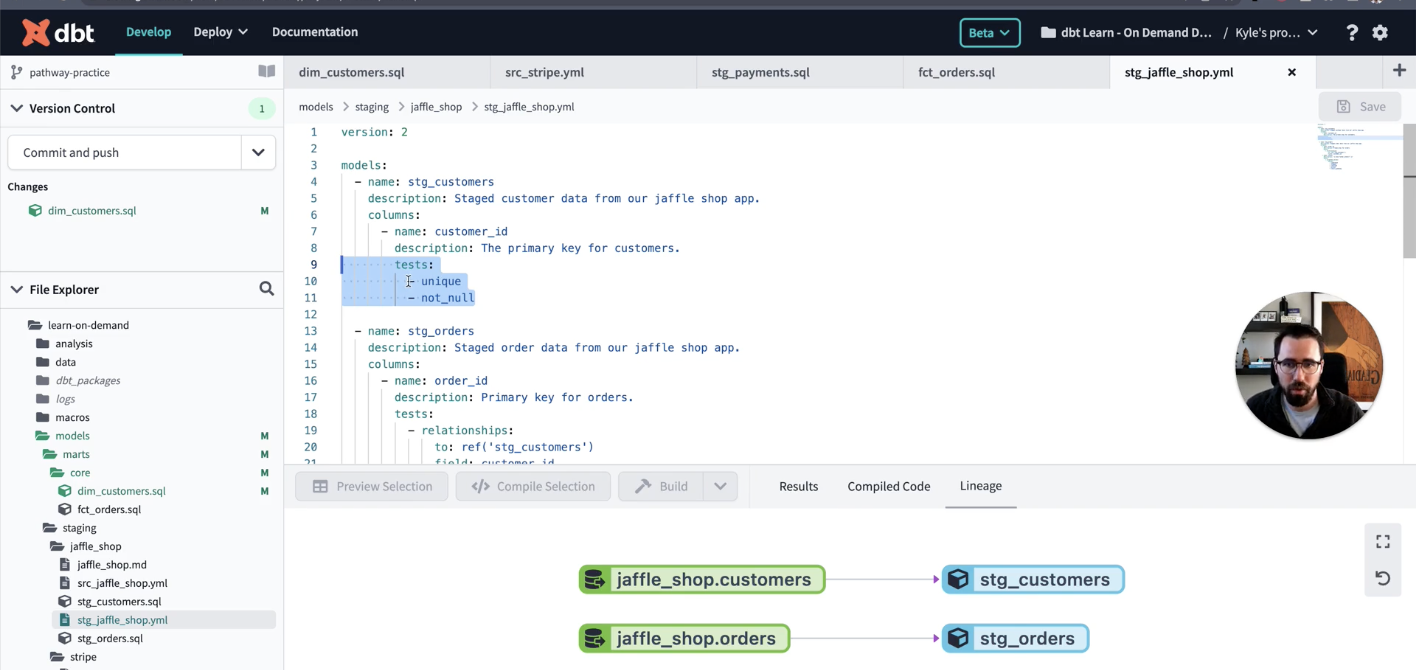

In terms of **documentation**, we can write a **`description`** on models/table columns etc. The documentation is then available in a **documentation site** for colleagues, stakeholders or even yourself to consult at a later stage.

The command **`dbt_test`** will **test the models** as they have been built. Under the hood, **dbt translates** the **tests** in **SQL code** that is **run against materialised tables and views**:

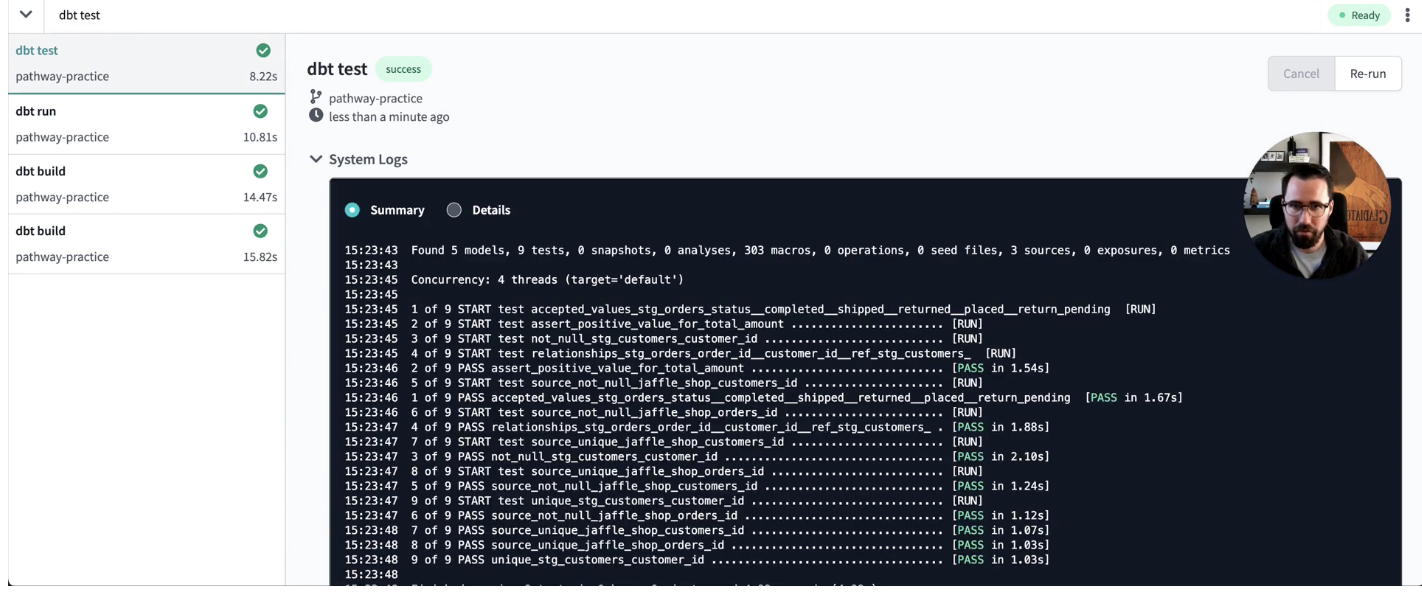

**`dbt build`** combines both `dbt run` and `dbt test` in one command.

Another important command is **`dbt docs generate`**, which will create a **documentation site** that you can **handle to stakeholders**. This also contains some **information** on the **tables** that have been **materialised**.

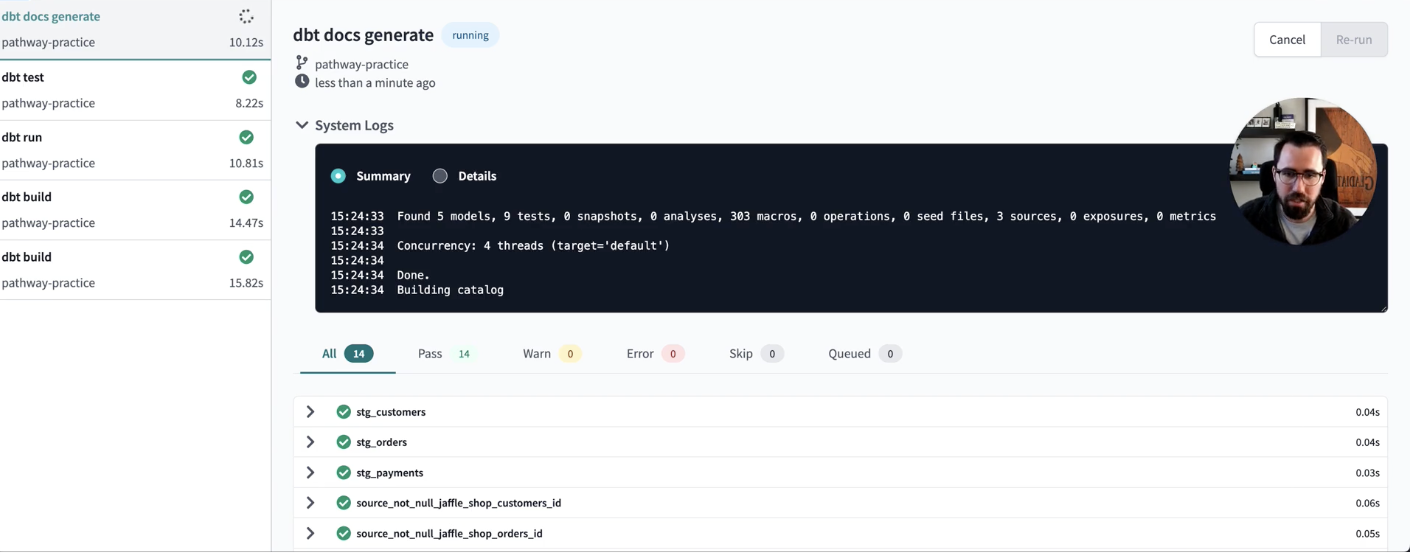

After the `dbt docs generate` command has been successfully run, we can click on the little **document icon** at the top to **access the documentation site**:

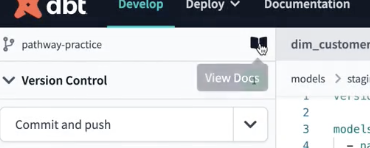

We can then access a **documentation site** that show us the documentation you wrote for the project:

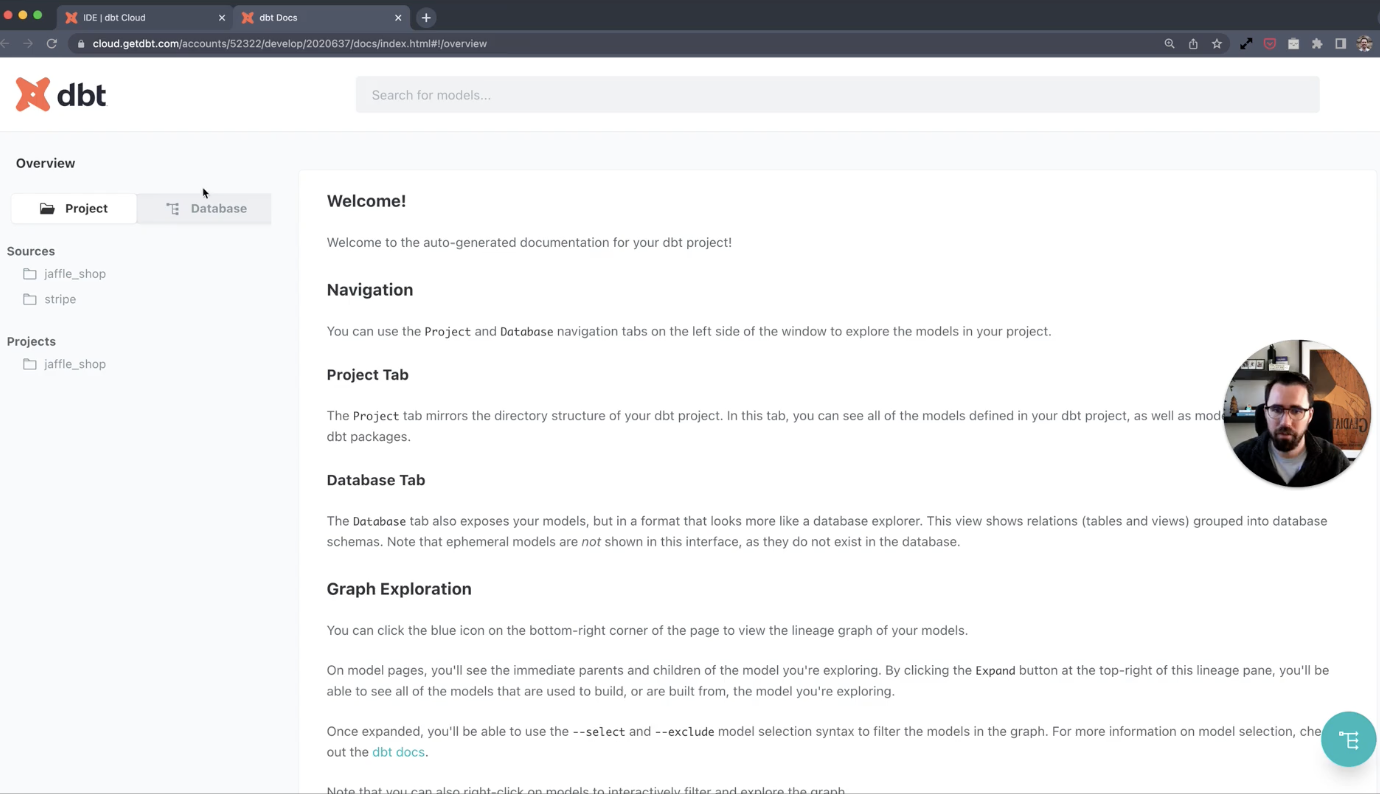

If you then click on the **bottom left green button** you can visualise the project **lineage graph** (i.e. the **DAG**): 

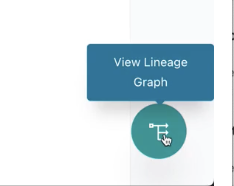

Linage graph for one model:

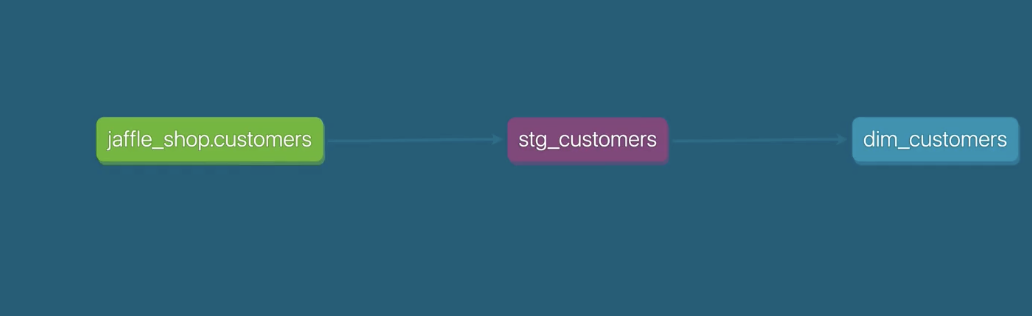

Lineage graph for the entire project:

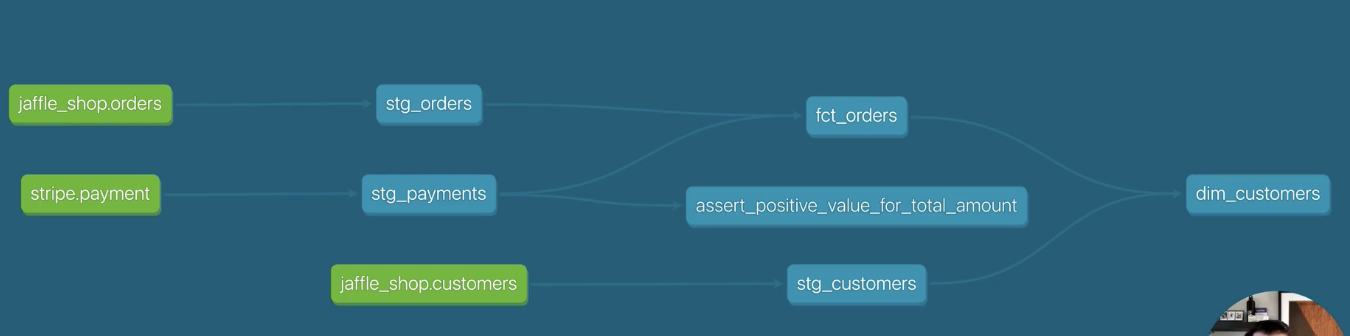

You can run dbt commands on a **schedule** when working on dbt cloud, rather than manually every time... This is for the stage of **deployment**. In dbt you can **set up environments** to keep development and deployment separate:

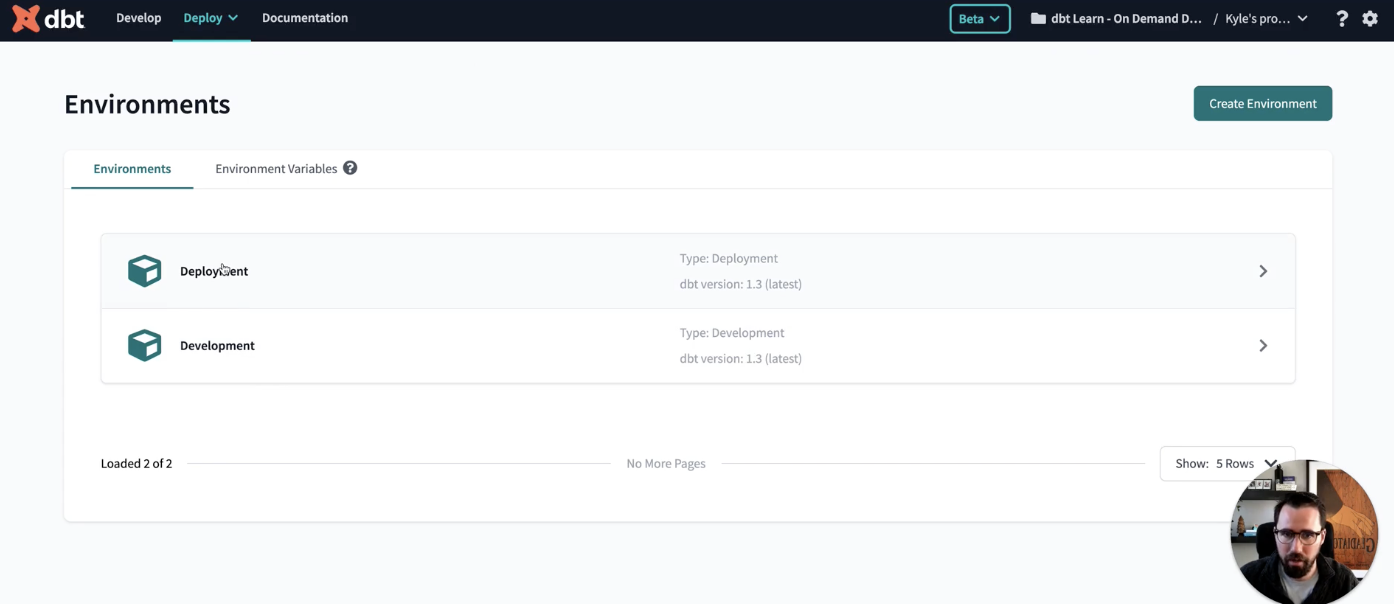

In the deployment environment we can **configure jobs**. You can see an example (`Daily Run`) in the image:

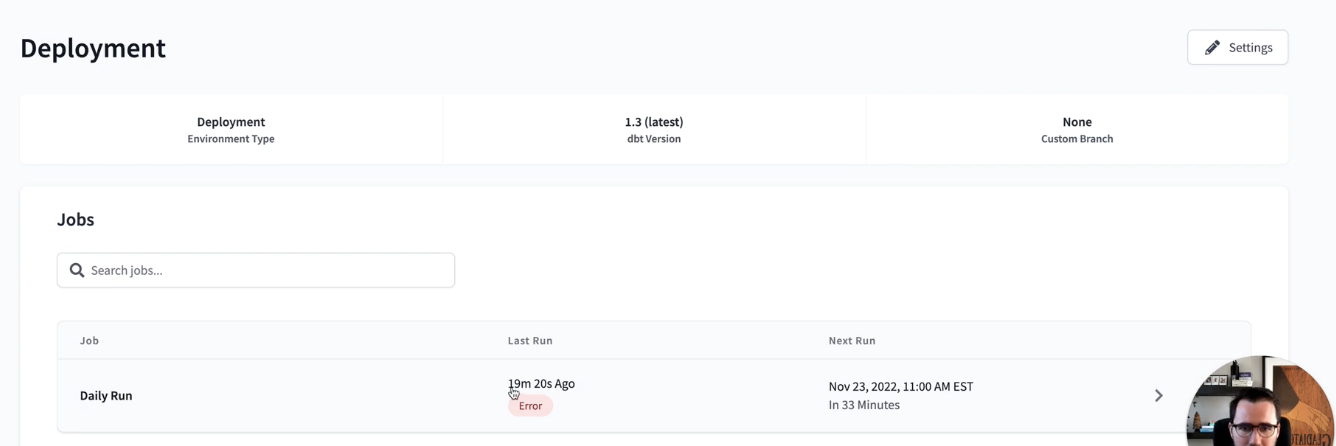

We can **change** the **schedule cadence** in the **settings** of the job:

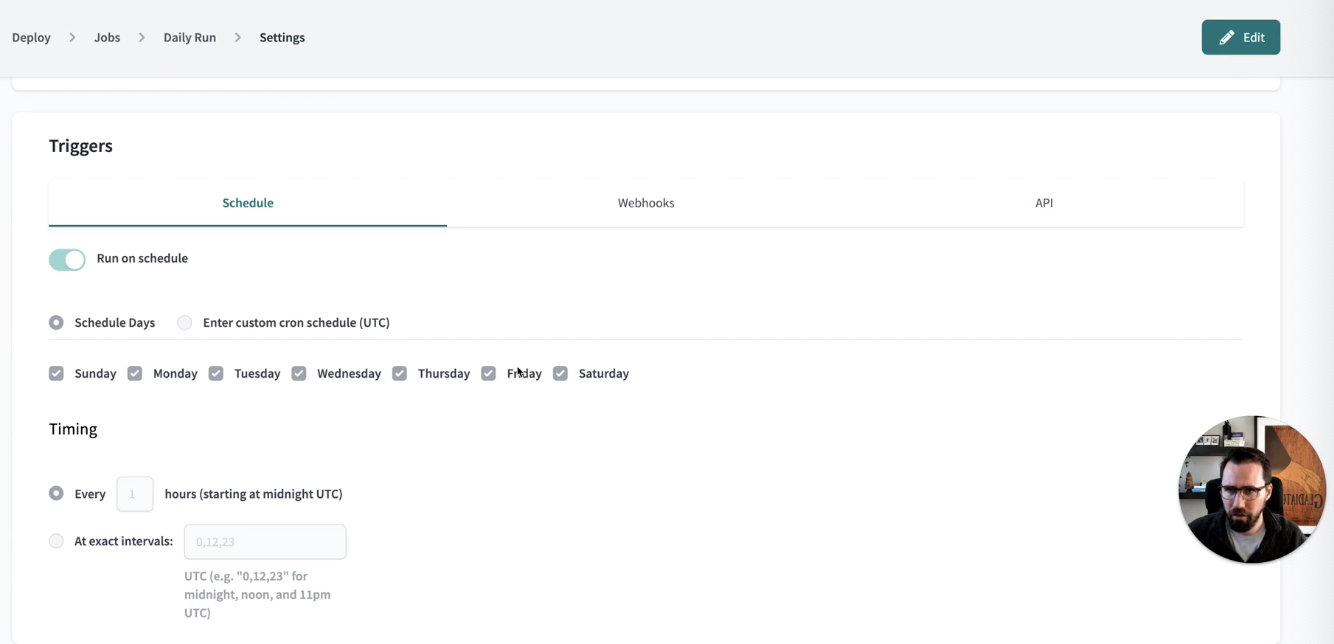

### **Review**



**Traditional Data Teams**

- **Data engineers** are responsible for **maintaining data infrastructure** and the **ETL process** for **creating tables** and **views**.
- **Data analysts** focus on **querying tables** and **views** to **drive business insights** for **stakeholders**.


**ETL and ELT**

- **ETL** (**extract transform load**) is the process of creating new database objects by **extracting data** from multiple data sources, **transforming** it on a **local** or **third party machine**, and **loading** the transformed data into a **data warehouse**.
- **ELT** (**extract load transform**) is a **more recent process** of creating new database objects by **first extracting and loading raw data** into a **data warehouse** and **then transforming** that data **directly** in the **warehouse**. The new ELT process is made possible by the introduction of **cloud-based data warehouse technologies**.


**Analytics Engineering**

- **Analytics engineers** focus on the **transformation** of **raw data** into transformed data that is **ready for analysis**. This new role on the data team changes the responsibilities of data engineers and data analysts.
- **Data engineers** can focus on **larger data architecture** and the **EL** in ELT.
- **Data analysts** can focus on **insight** and **dashboard work** using the **transformed data**.
- Note: At a small company, a data team of one may own all three of these roles and responsibilities. As your team grows, the lines between these roles will remain **blurry**.

**`dbt`**

- dbt empowers data teams to **leverage software engineering principles** for **transforming data**.
- The focus of this course is to build your analytics engineering mindset and dbt skills to give you more leverage in your work.